<p><img alt="UNQ logo" height="45px" src="http://www.unq.edu.ar/images/logo_unqui_footer.png" align="left" hspace="10px" vspace="0px"></p><h1>Redes Neuronales y Lógica Difusa</h1>

Lógica difusa con módulo [***Scikit-Fuzzy***](https://pythonhosted.org/scikit-fuzzy/)

# Ejemplo: Calculador automático de propina

Instalo el módulo scikit-fuzzy

In [ ]:
!python -m pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 2.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=76068ae8a2e2b43dbc210a3a4e968af5b28dd4b51887af60ff503d5389a52664
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


Importo los módulos a utilizar

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Defino las variables entrada y salida del modelo fuzzy

In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
# Defino antecedente "comida"
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')

# Defino antecedente "servicio"
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'servicio')

# Defino consecuente "propina"
propina = ctrl.Consequent(np.arange(0, 26, 1), 'propina')

Determino las funciones de membresía

In [ ]:
# La automembresía funciona con .automf(3, 5, o 7)
comida.automf(3)
servicio.automf(3)

propina['low'] = fuzz.trimf(propina.universe, [0, 0, 13],)
propina['medium'] = fuzz.trimf(propina.universe, [0, 13, 25])
propina['high'] = fuzz.trimf(propina.universe, [13, 25, 25])

Puedo usar el método *view* para ver cómo se ven las membresías

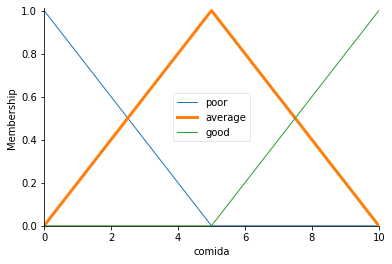

In [ ]:
comida['average'].view()

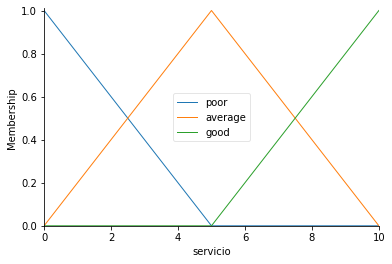

In [ ]:
servicio.view()

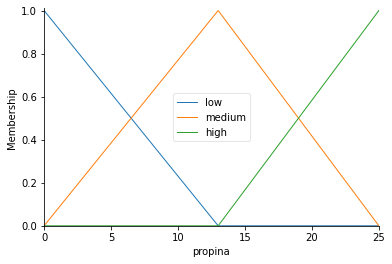

In [ ]:
propina.view()

## Reglas difusas

Ahora definamos las relaciones entre las variables de entrada y salida.
Para este ejemplo simple esas relaciones serán:


1.   Si la comida es *poor* o el servicio es *poor*, entonces la propina va a ser *low*.
2.   Si el servicio es *average*, entonces la propina es *medium*.
3.   Si la comida es *good* o el servicio es *good*, entonces la propina será *high*.

In [ ]:
regla1 = ctrl.Rule(comida['poor'] | servicio['poor'], propina['low'])
regla2 = ctrl.Rule(servicio['average'], propina['medium'])
regla3 = ctrl.Rule(servicio['good'] | comida['good'], propina['high'])

Grafico las reglas

Regla 1: <bound method Rule.view_n of IF comida[poor] OR servicio[poor] THEN propina[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax>


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7bbef878d0>)

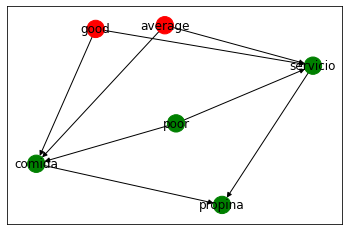

In [ ]:
print("Regla 1: " + str(regla1.view_n))

regla1.view_n()

Regla 2: <bound method Rule.view_n of IF servicio[average] THEN propina[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax>


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7bbeb5da90>)

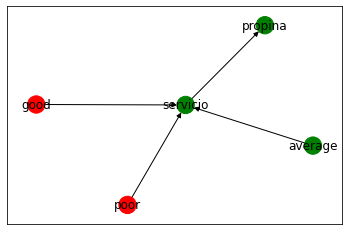

In [ ]:
print("Regla 2: " + str(regla2.view_n))
regla2.view_n()

Regla 3: <bound method Rule.view_n of IF servicio[good] OR comida[good] THEN propina[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax>


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7bbeb782e8>)

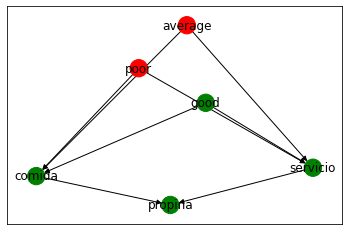

In [ ]:
print("Regla 3: " + str(regla3.view_n))
regla3.view_n()

## Creación de sistema de control y simulación

Ahora que ya tenemos las reglas definidas, podemos crear un sistema de control de la siguiente forma:

In [ ]:
controlPropina = ctrl.ControlSystem([regla1, regla2, regla3])

Para simular el sistema de control vamos a utilizar el método *ControlSystemSimulation*. Podemos pensar en el objeto que genera este método como la representación de nuestro controlador aplicado a una circunstancia específica.

In [ ]:
simulacionPropina = ctrl.ControlSystemSimulation(controlPropina)

Vamos a simular ahora nuestro sistema de control especificando el valor de las entradas y utilizando el método *compute*.

In [ ]:
simulacionPropina.input['comida'] = 5.9
simulacionPropina.input['servicio'] = 9.9

simulacionPropina.compute()

Una vez computado, podemos ver el resultado, así como también graficar cómo se llegó a él.

Propina: 20.39%


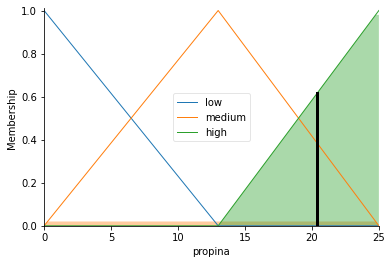

In [ ]:
print("Propina: {:.2f}%".format(simulacionPropina.output['propina']))
propina.view(sim=simulacionPropina)